In [1]:
import os
import shutil

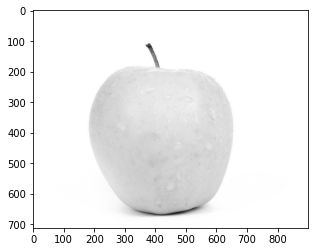

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import os.path
import cv2

data_folder = os.path.join("ncd", "Gray", "Apple")
file_to_open = os.path.join(data_folder, "Apple1.jpg")

img = cv2.imread(file_to_open)
plt.imshow(img)
plt.show()

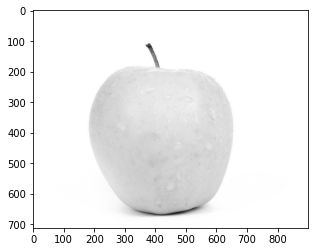

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import os.path
import cv2

data_folder = os.path.join("ncd", "Gray", "Apple")
file_to_open = os.path.join(data_folder, "Apple1.jpg")

img = cv2.imread(file_to_open)
plt.imshow(img)
plt.show()

References: 
1. https://www.geeksforgeeks.org/python-move-all-files-from-subfolders-to-main-folder/
2. https://stackoverflow.com/questions/123198/how-to-copy-files
3. https://pypi.org/project/split-folders/
4. https://www.geeksforgeeks.org/create-a-directory-in-python/
5. https://www.geeksforgeeks.org/python-check-if-a-file-or-directory-exists-2/

In [4]:
# DOMAIN B: COLOR 
root = "ncd"
domain = "ColorfulOriginal"
src = os.path.join(root, domain)
sub_directories = os.listdir(src)

dest = "color_all"
isDir = os.path.isdir(dest) 
if not isDir:
    os.mkdir(dest) 


for d in sub_directories:
    sub_directory = os.path.join(root, domain, d)
    files = os.listdir(sub_directory)
    for file in files:
        file_name = os.path.join(sub_directory, file)
        shutil.copy(file_name, dest)


print(len(os.listdir(dest)))

721


In [5]:
# put them all in the same domain folder

# DOMAIN A: GRAY 
root = "ncd"
domain = "Gray"
src = os.path.join(root, domain)
sub_directories = os.listdir(src)

dest = "gray_all_paired"
isDir = os.path.isdir(dest) 
if not isDir:
    os.mkdir(dest) 


for d in sub_directories:
    sub_directory = os.path.join(root, domain, d)
    files = os.listdir(sub_directory)
    for file in files:
        file_name = os.path.join(sub_directory, file)
        # contains a pair in colored dataset
        is_paired = os.path.isfile(os.path.join("color_all", file))
        if is_paired:
            shutil.copy(file_name, dest)
        else:

            dest_alternate = "gray_all_unpaired"
            isDir = os.path.isdir(dest_alternate) 
            if not isDir:
                os.mkdir(dest_alternate) 
            shutil.copy(file_name, dest_alternate)

print(len(os.listdir(dest)))
print(len(os.listdir(dest_alternate)))

721
15


In [6]:
# create directories
# DOMAIN B: COLOR
dests_color = ["ncdataset/color/train", "ncdataset/color/test", "ncdataset/color/val"]
for d in dests_color:
    isDir = os.path.isdir(d) 
    if not isDir:
        os.makedirs(d) 
# DOMAIN A: GRAY       
dests_gray = ["ncdataset/gray/train", "ncdataset/gray/test", "ncdataset/gray/val"]
for d in dests_gray:
    isDir = os.path.isdir(d) 
    if not isDir:
        os.makedirs(d) 

In [7]:
# if they don't have a pair, then they are used for testing (15)
files = os.listdir("gray_all_unpaired")
for file in files:
    path = os.path.join("gray_all_unpaired", file)
    shutil.copy(path, dests_gray[1])

Selecting a random file: https://stackoverflow.com/questions/25096158/copying-random-files-from-a-file-tree

In [8]:
# put remaining 80% in train and 20% in val
import random
import math 

train_ratio = 0.8
dirs_train_val_gray = os.listdir("gray_all_paired")
dirs_train_val_color = os.listdir("color_all")

path_gray_train = "ncdataset/gray/train"
path_gray_val = "ncdataset/gray/val"
path_color_train = "ncdataset/color/train"
path_color_val = "ncdataset/color/val"

# checks
assert len(dirs_train_val_gray) == len(dirs_train_val_color) # make sure they are truly paired
# TODO: EMPTY THE DIRECTORIES

# get necessary initial values
num_total = len(dirs_train_val_color)
num_train = math.floor(train_ratio * num_total)
num_val = num_total - num_train

# loop and copy into train
for i in range(num_train):
    # choose randomly
    # TODO: use seed?
    color_file = random.choice(dirs_train_val_color)
    gray_file = color_file

    # discrepancies in capitalization
    if gray_file not in dirs_train_val_gray:
        if gray_file[0].isupper():
            gray_file = gray_file.lower()
            print('lower', gray_file)
        else:
            gray_file = gray_file.capitalize()
            print('upper', gray_file)
    # remove from list
    dirs_train_val_color.remove(color_file)
    dirs_train_val_gray.remove(gray_file)
    
    path_gray = os.path.join("gray_all_paired", gray_file)
    path_color = os.path.join("color_all", color_file)
    # copy files in both directories
    shutil.copy(path_gray, path_gray_train)
    shutil.copy(path_color, path_color_train)

    
# copy remaining into val, doesn't have to be random but easier to keep the code
for i in range(num_val):
    # choose randomly
    # TODO: use seed?
    color_file = random.choice(dirs_train_val_color)
    gray_file = color_file

    # discrepancies in capitalization
    if gray_file not in dirs_train_val_gray:
        if gray_file[0].isupper():
            gray_file = gray_file.lower()
            print('lower', gray_file)
        else:
            gray_file = gray_file.capitalize()
            print('upper', gray_file)
    # remove from list
    dirs_train_val_color.remove(color_file)
    dirs_train_val_gray.remove(gray_file)
    
    path_gray = os.path.join("gray_all_paired", gray_file)
    path_color = os.path.join("color_all", color_file)
    # copy files in both directories
    shutil.copy(path_gray, path_gray_val)
    shutil.copy(path_color, path_color_val)
    
len(dirs_train_val_gray)

upper Pear25.jpg
upper Potato22.jpg
upper Potato34.jpg
upper Potato26.jpg
upper Potato33.jpg
upper Pear24.jpg
upper Potato29.jpg
upper Pear27.jpg
upper Potato20.jpg
upper Potato24.jpg
upper Pear23.jpg
upper Potato21.jpg
upper Potato32.jpg
upper Pear28.jpg
upper Cherry34.jpg
upper Potato25.jpg
upper Potato28.jpg
upper Potato35.jpg
upper Pear26.jpg
lower tomato2.jpg
upper Potato23.jpg
upper Potato31.jpg
upper Potato27.jpg
upper Potato30.jpg
lower tomato1.jpg


0

In [9]:
# import splitfolders

# # Split with a ratio.
# # To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
# splitfolders.ratio("ncd/Gray", output="out",
#     seed=1337, ratio=(.8, .2), group_prefix=None, move=False) # default values

In [10]:
# experiment using different dataset sizes for training and validation